In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle
import matplotlib
import cv2
from pathlib import Path
import seaborn as sns
import os

import sys
sys.path.append("..")
import scripts.bcc_utilities as bcc

## Import et préparation des données

In [4]:
images_path = Path('../data/images/original/base')
save_dir = Path('../data/images')
eda_save_dir = Path('../data/eda_results')
mean_images_dir = Path('../data/eda_results/mean_images')

distr_cols = ['gray_distribution', 'red_distribution', 'green_distribution', 'blue_distribution']

cmap = matplotlib.colormaps['tab20']
cmap_len = 20

In [5]:
pix_dis_path = Path(save_dir, 'pixel_distribution.csv')

if pix_dis_path.exists():
    df = pd.read_csv(pix_dis_path, index_col='img_id')
    df_pix_dis = df.copy()
    for col in distr_cols:
        df_pix_dis[col] = df_pix_dis[col].apply(lambda arr_str: bcc.str_to_list(arr_str))
else:
    pixel_distribution = bcc.analyze_pixel_distribution(images_path)
    df_pix_dis = pd.DataFrame(pixel_distribution).set_index('img_id')
    df_pix_dis.to_csv(pix_dis_path)

df_pix_dis.head()

,blood_cell,source,healthy,gray_distribution,red_distribution,green_distribution,blue_distribution
img_id,,,,,,,
ART_kag_000_016440.jpg,art,kag,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 3.0, 3.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ART_kag_000_016441.jpg,art,kag,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ART_kag_000_016442.jpg,art,kag,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ART_kag_000_016443.jpg,art,kag,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ART_kag_000_016444.jpg,art,kag,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [6]:
df_pix_dis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57740 entries, ART_kag_000_016440.jpg to PLT_kag_104_018673.jpg
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   blood_cell          57740 non-null  object
 1   source              57740 non-null  object
 2   healthy             57740 non-null  bool  
 3   gray_distribution   57740 non-null  object
 4   red_distribution    57740 non-null  object
 5   green_distribution  57740 non-null  object
 6   blue_distribution   57740 non-null  object
dtypes: bool(1), object(6)
memory usage: 3.1+ MB


In [7]:
blood_cells = list(df_pix_dis['blood_cell'].unique())
sources = list(df_pix_dis['source'].unique())
n_pixel_value = 256

In [8]:
print(blood_cells)
print(sources)

['art', 'bas', 'eos', 'ery', 'img', 'lym', 'mon', 'myb', 'neu', 'plt']
['kag', 'bar', 'raa', 'mun']


## 1. Analyse des images

### 1.1. Analyse de la distribution des pixels

In [22]:
# Synthèse du dataset

summary_save_path = Path(eda_save_dir, 'pix_dis_summary.csv')

dict_summary = {
    'blood_cell': [], 
    'source': [], 
    'gray_distribution': [], 
    'red_distribution': [], 
    'green_distribution': [], 
    'blue_distribution': [],
}

for blood_cell in blood_cells:
    for source in sources:
        df_sub = df_pix_dis[(df_pix_dis['blood_cell'] == blood_cell) & (df_pix_dis['source'] == source)]
        n_obs = df_sub.shape[0]

        dict_summary['blood_cell'].append(blood_cell)
        dict_summary['source'].append(source)

        for distr_col in distr_cols:
            if n_obs == 0:
                dict_summary[distr_col].append(np.array([0.0]*n_pixel_value))
            else:
                distr = bcc.srs_to_array(df_sub[distr_col])
                n_pixels_per_img = distr.sum() / n_obs
                dict_summary[distr_col].append(distr.mean(axis=0)/n_pixels_per_img)

df_summary = pd.DataFrame(dict_summary)
df_summary.to_csv(summary_save_path)
df_summary.head()

,blood_cell,source,gray_distribution,red_distribution,green_distribution,blue_distribution
0,art,kag,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.511649212725972e-06, 3.214334746136478e-06,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,art,bar,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,art,raa,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,art,mun,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,bas,kag,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00018497480741339742, 5.3882779445643056e-0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [23]:
df_summary.shape

(40, 6)

#### 1.1.1. En fonction de la source des images

##### a. Images en nuance de gris

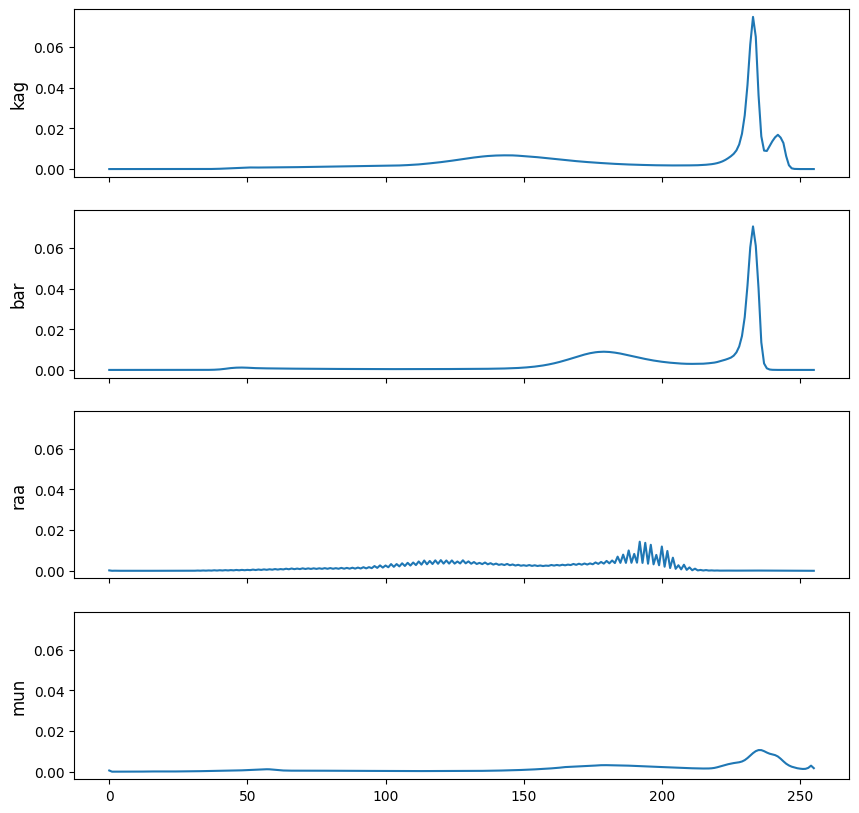

In [68]:
# Distribution (en proportion de nombre total de pixels de l'image) des valeurs des pixels des images en nuances de gris, par source

fig, axs = plt.subplots(nrows=len(sources), figsize=(10, 10), sharex=True, sharey=True)

for src in range(len(sources)):
    sub_df = df_summary[(df_summary['source'] == sources[src])]
    grays = bcc.srs_to_array(sub_df['gray_distribution']).mean(axis=0)
    axs[src].plot(grays, label='Distribution')


for ax, row in zip(axs, sources):
    ax.set_ylabel(row, rotation=90, size='large')

fig.savefig(Path(eda_save_dir, 'gray_pixels_distribution_by_source.png'))
plt.show();

##### b. Images en couleurs

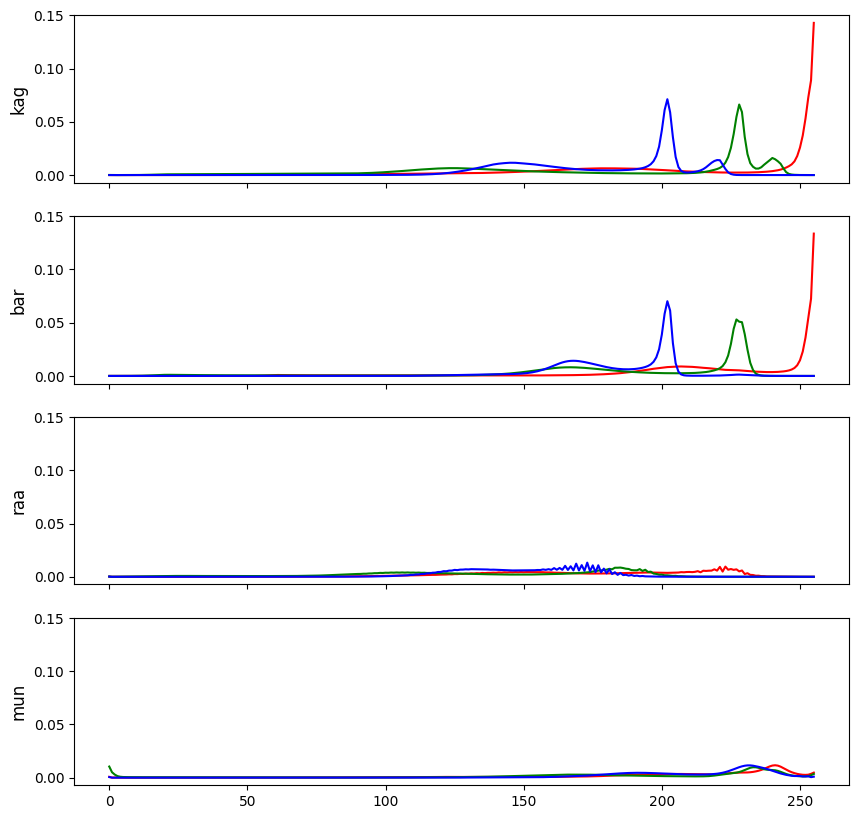

In [69]:
# Distribution (en proportion de nombre total de pixels de l'image) des valeurs des pixels des images sur les canaux RGB, par source

fig, axs = plt.subplots(nrows=len(sources), figsize=(10, 10), sharex=True, sharey=True)

for src in range(len(sources)):
    sub_df = df_summary[(df_summary['source'] == sources[src])]
    reds = bcc.srs_to_array(sub_df['red_distribution']).mean(axis=0)
    greens = bcc.srs_to_array(sub_df['green_distribution']).mean(axis=0)
    blues = bcc.srs_to_array(sub_df['blue_distribution']).mean(axis=0)

    axs[src].plot(reds, color='red')
    axs[src].plot(greens, color='green')
    axs[src].plot(blues, color='blue')

for ax, row in zip(axs, sources):
    ax.set_ylabel(row, rotation=90, size='large')

fig.savefig(Path(eda_save_dir, 'rgb_pixels_distribution_by_source.png'))
plt.show();

#### 1.1.2. En fonction de la cellule sanguine

##### a. Images en nuances de gris

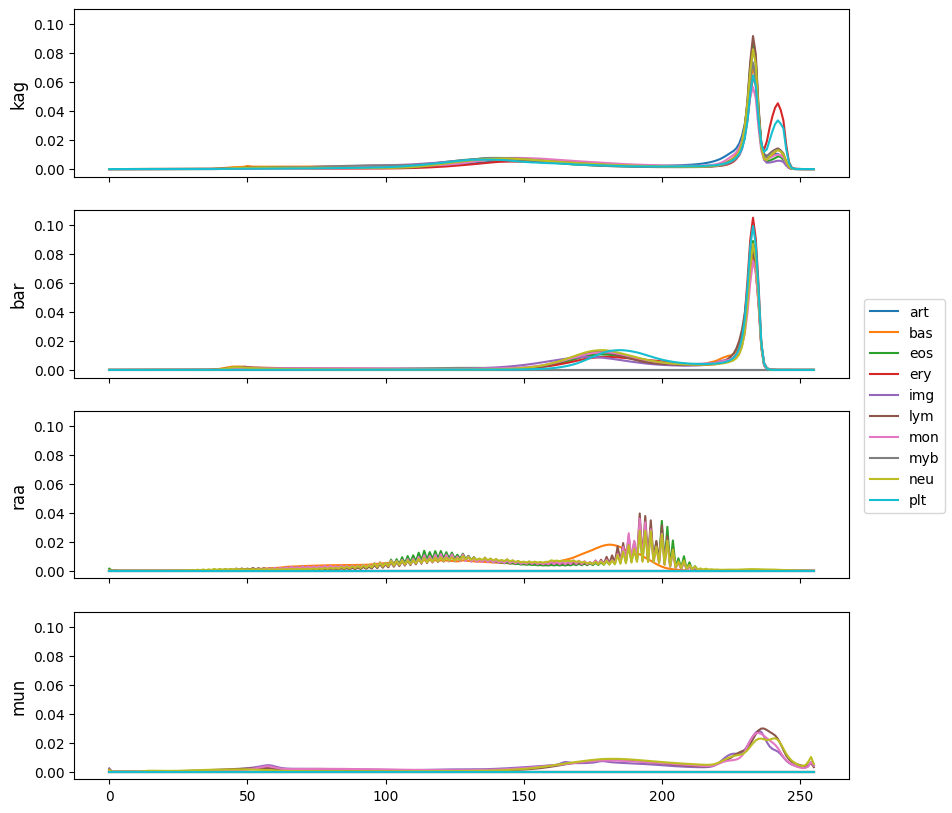

In [121]:
# Distribution (en proportion de nombre total de pixels de l'image) des valeurs des pixels des images en nuances de gris, par source et par cellule représentée

len_range = len(blood_cells)
steps = 1 if len_range > cmap_len // 2 else 2
colors = [cmap(i) for i in range(0, len_range*steps, steps)]

fig, axs = plt.subplots(nrows=len(sources), figsize=(10, 10), sharex=True, sharey=True)

for src in range(len(sources)):
    for bc in range(len(blood_cells)):
        sub_df = df_summary[(df_summary['source'] == sources[src]) & (df_summary['blood_cell'] == blood_cells[bc])]
        grays = bcc.srs_to_array(sub_df['gray_distribution']).mean(axis=0)
        axs[src].plot(grays, color=colors[bc], label=blood_cells[bc])

for ax, row in zip(axs, sources):
    ax.set_ylabel(row, rotation=90, size='large')

patches = [mlines.Line2D([], [], color=colors[i], label=bc) for i, bc in enumerate(blood_cells)]
fig.legend(handles=patches, loc='outside right center')

fig.savefig(Path(eda_save_dir, 'gray_pixels_distribution_by_source-blood_cell.png'))
plt.show();

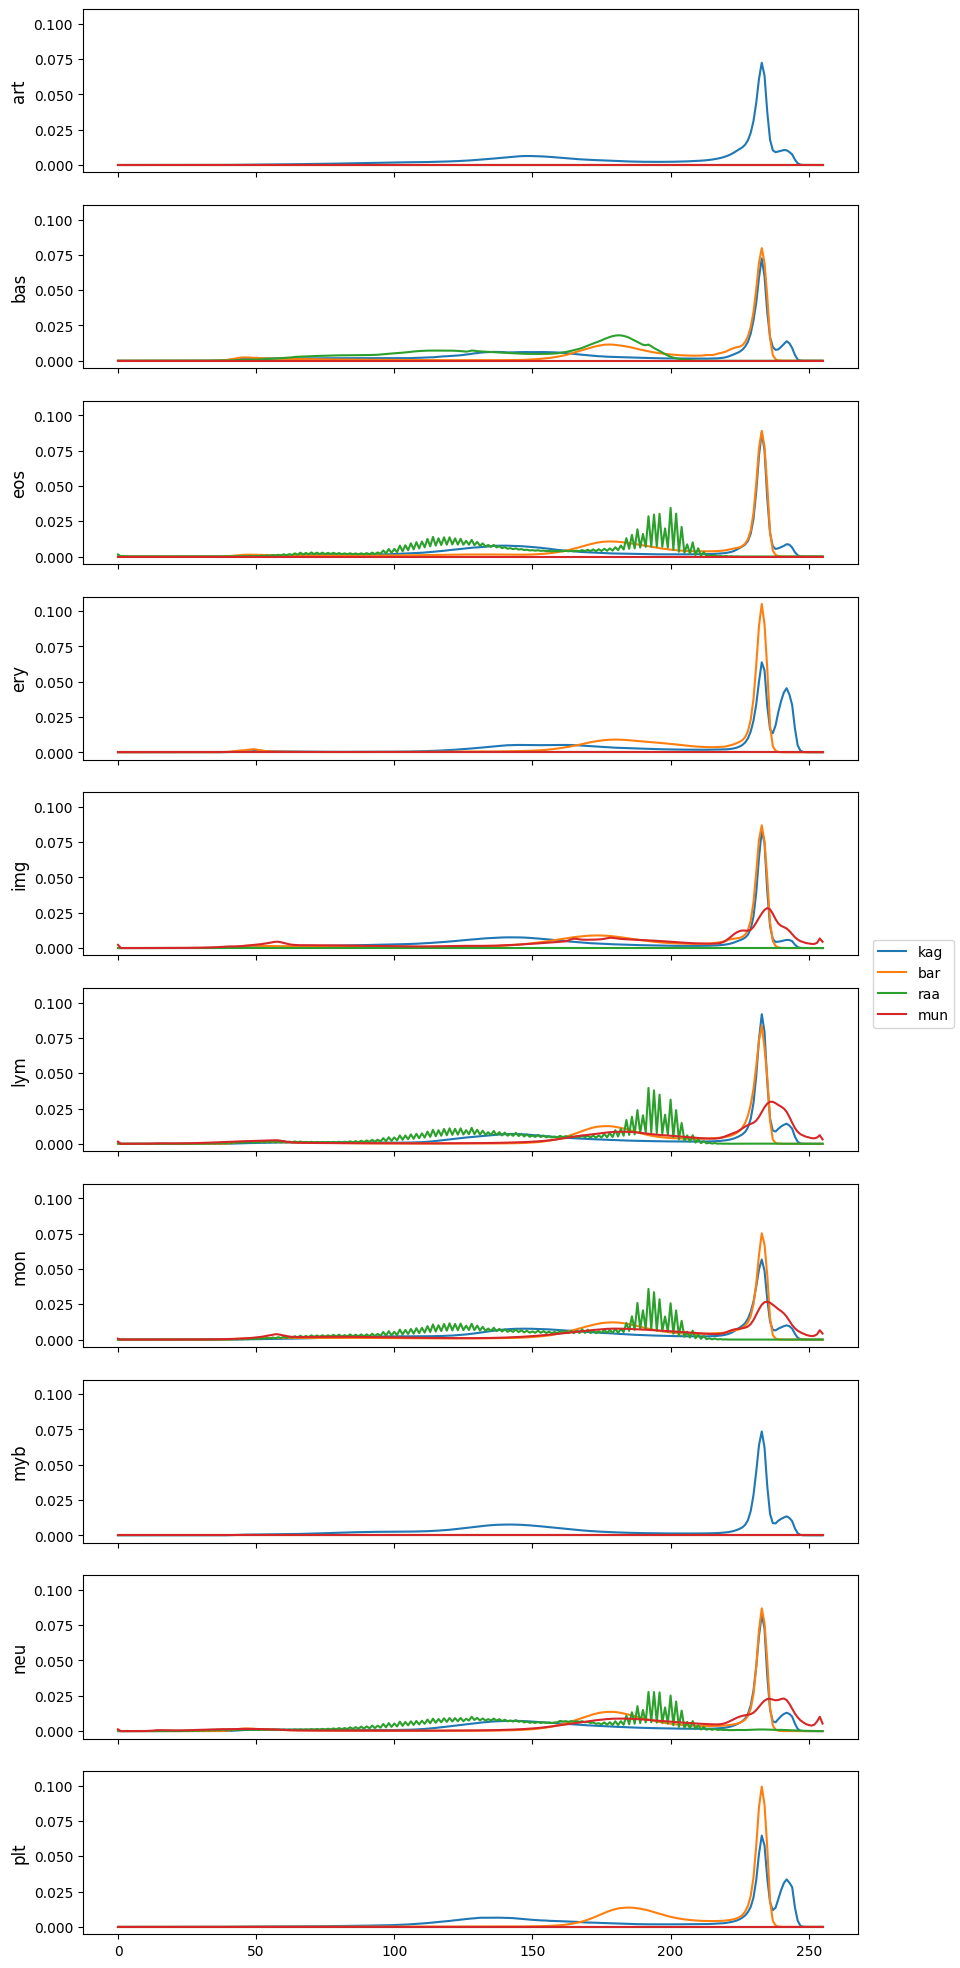

In [145]:
# Distribution (en proportion de nombre total de pixels de l'image) des valeurs des pixels des images en nuances de gris, par cellule représentée et par source

len_range = len(sources)
steps = 1 if len_range > cmap_len // 2 else 2
colors = [cmap(i) for i in range(0, len_range*steps, steps)]

fig, axs = plt.subplots(nrows=len(blood_cells), figsize=(10, 25), sharex=True, sharey=True)

for bc in range(len(blood_cells)):
    for src in range(len(sources)):
        df_sub = df_summary[(df_summary['source'] == sources[src]) & (df_summary['blood_cell'] == blood_cells[bc])]
        grays = bcc.srs_to_array(df_sub['gray_distribution']).mean(axis=0)
        axs[bc].plot(grays, color=colors[src], label=sources[src])

for ax, row in zip(axs, blood_cells):
    ax.set_ylabel(row, rotation=90, size='large')

patches = [mlines.Line2D([], [], color=colors[i], label=src) for i, src in enumerate(sources)]
fig.legend(handles=patches, loc='outside right center')

fig.savefig(Path(eda_save_dir, 'gray_pixels_distribution_by_blood_cell-source.png'))
plt.show();

##### b. Images en couleurs

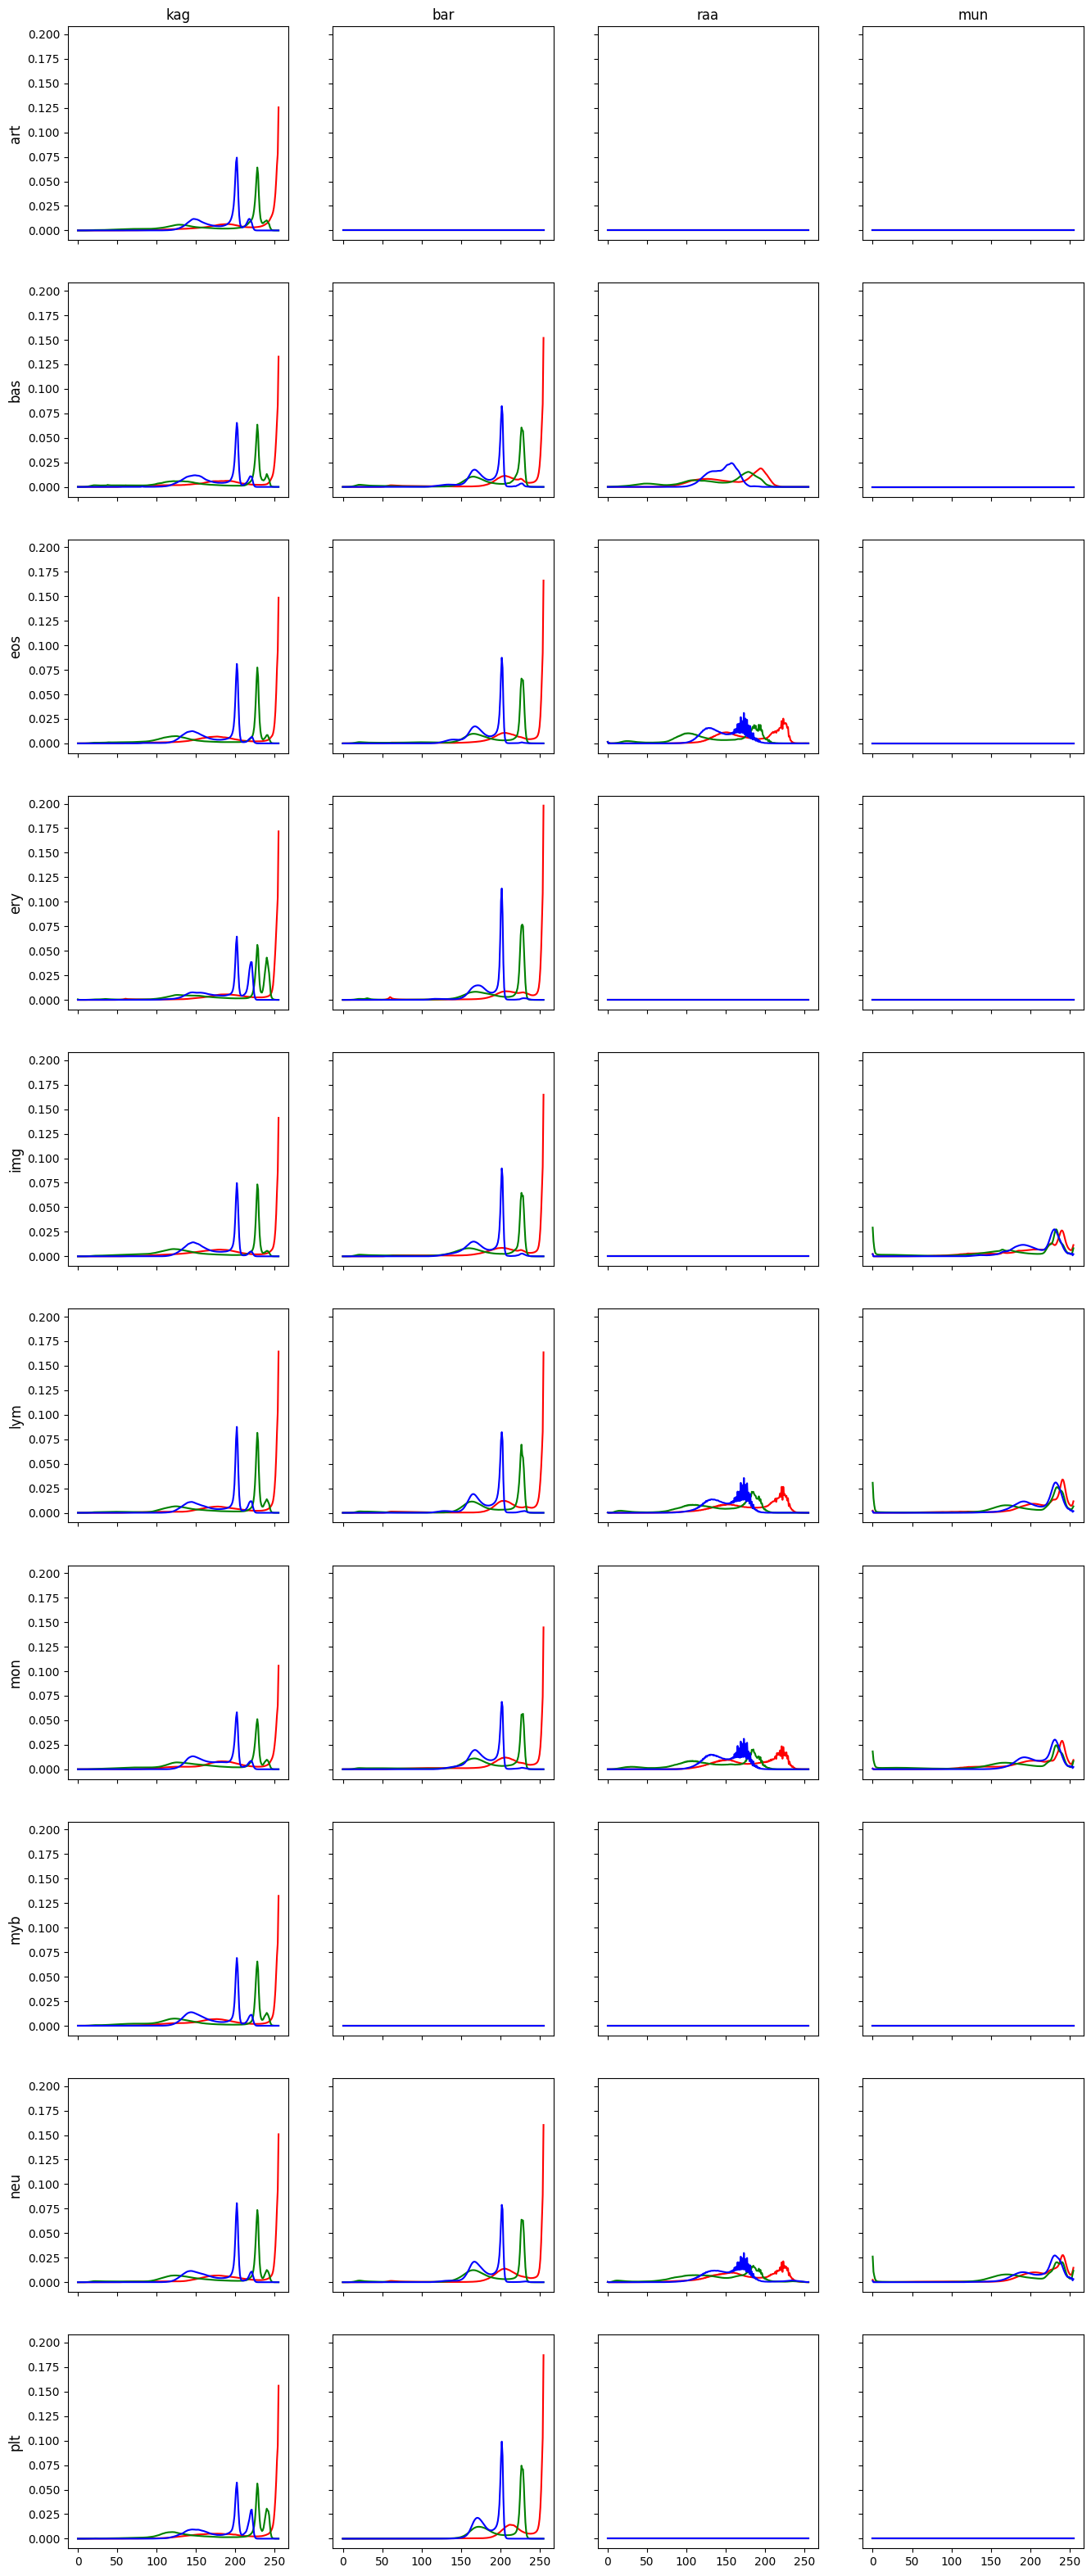

In [24]:
# Distribution (en proportion de nombre total de pixels de l\'image) des valeurs des pixels des images sur les canaux RGB, par pr cellule représentée et par source

fig, axs = plt.subplots(ncols=len(sources), nrows=len(blood_cells), figsize=(16, 40), sharex=True, sharey=True)

for bc in range(len(blood_cells)):
    for src in range(len(sources)):
        df_sub = df_summary[(df_summary['blood_cell'] == blood_cells[bc]) & (df_summary['source'] == sources[src])]
        reds = bcc.srs_to_array(df_sub['red_distribution']).reshape((-1,))
        greens = bcc.srs_to_array(df_sub['green_distribution']).reshape((-1,))
        blues = bcc.srs_to_array(df_sub['blue_distribution']).reshape((-1,))

        axs[bc, src].plot(reds, color='red')
        axs[bc, src].plot(greens, color='green')
        axs[bc, src].plot(blues, color='blue')

for ax, col in zip(axs[0], sources):
    ax.set_title(col)

for ax, row in zip(axs[:, 0], blood_cells):
    ax.set_ylabel(row, rotation=90, size='large')

fig.savefig(Path(eda_save_dir, 'rgb_pixels_distribution_by_blood_cell-source.png'))
plt.show();

### 1.2. Analyse de la position des cellules sanguine dans les images

#### 1.2.1. Images moyennes

##### a. Par source

In [52]:
mean_images_by_source = []

for source in sources:
    mean_image_path = Path(mean_images_dir, f'by_source/{source}_mean_image.jpg')
    if mean_image_path.exists():
        mean_image = cv2.imread(str(mean_image_path), cv2.IMREAD_GRAYSCALE)
    else:
        imgs_list = list(df_pix_dis[(df_pix_dis['source'] == source)].index)
        path_list = [bcc.get_img_path(images_path, img_name) for img_name in imgs_list]
        mean_image = bcc.mean_image(path_list)
        cv2.imwrite(str(mean_image_path), mean_image)
    mean_images_by_source.append(mean_image)

##### b. Par cellule représentée

In [53]:
mean_images_by_class = []

for blood_cell in blood_cells:
    mean_image_path = Path(mean_images_dir, f'by_blood_cell/{blood_cell}_mean_image.jpg')
    if mean_image_path.exists():
        mean_image = cv2.imread(str(mean_image_path), cv2.IMREAD_GRAYSCALE)
    else:
        imgs_list = list(df_pix_dis[(df_pix_dis['blood_cell'] == blood_cell)].index)
        path_list = [bcc.get_img_path(images_path, img_name) for img_name in imgs_list]
        mean_image = bcc.mean_image(path_list)
        cv2.imwrite(str(mean_image_path), mean_image)
    mean_images_by_class.append(mean_image)

##### c. Par source et par cellule représentée

In [54]:
mean_images = []

for blood_cell in blood_cells:
    for source in sources:
        mean_image_path = Path(mean_images_dir, f'{source}_{blood_cell}_mean_image.jpg')
        if mean_image_path.exists():
            mean_image = cv2.imread(str(mean_image_path), cv2.IMREAD_GRAYSCALE)
        else:
            imgs_list = list(df_pix_dis[(df_pix_dis['blood_cell'] == blood_cell) & (df_pix_dis['source'] == source)].index)
            if len(imgs_list) > 0:
                path_list = [bcc.get_img_path(images_path, img_name) for img_name in imgs_list]
                mean_image = bcc.mean_image(path_list)
                cv2.imwrite(str(mean_image_path), mean_image)
            else:
                mean_image = None
        mean_images.append(mean_image)

#### 1.2.2. En fonction de la source

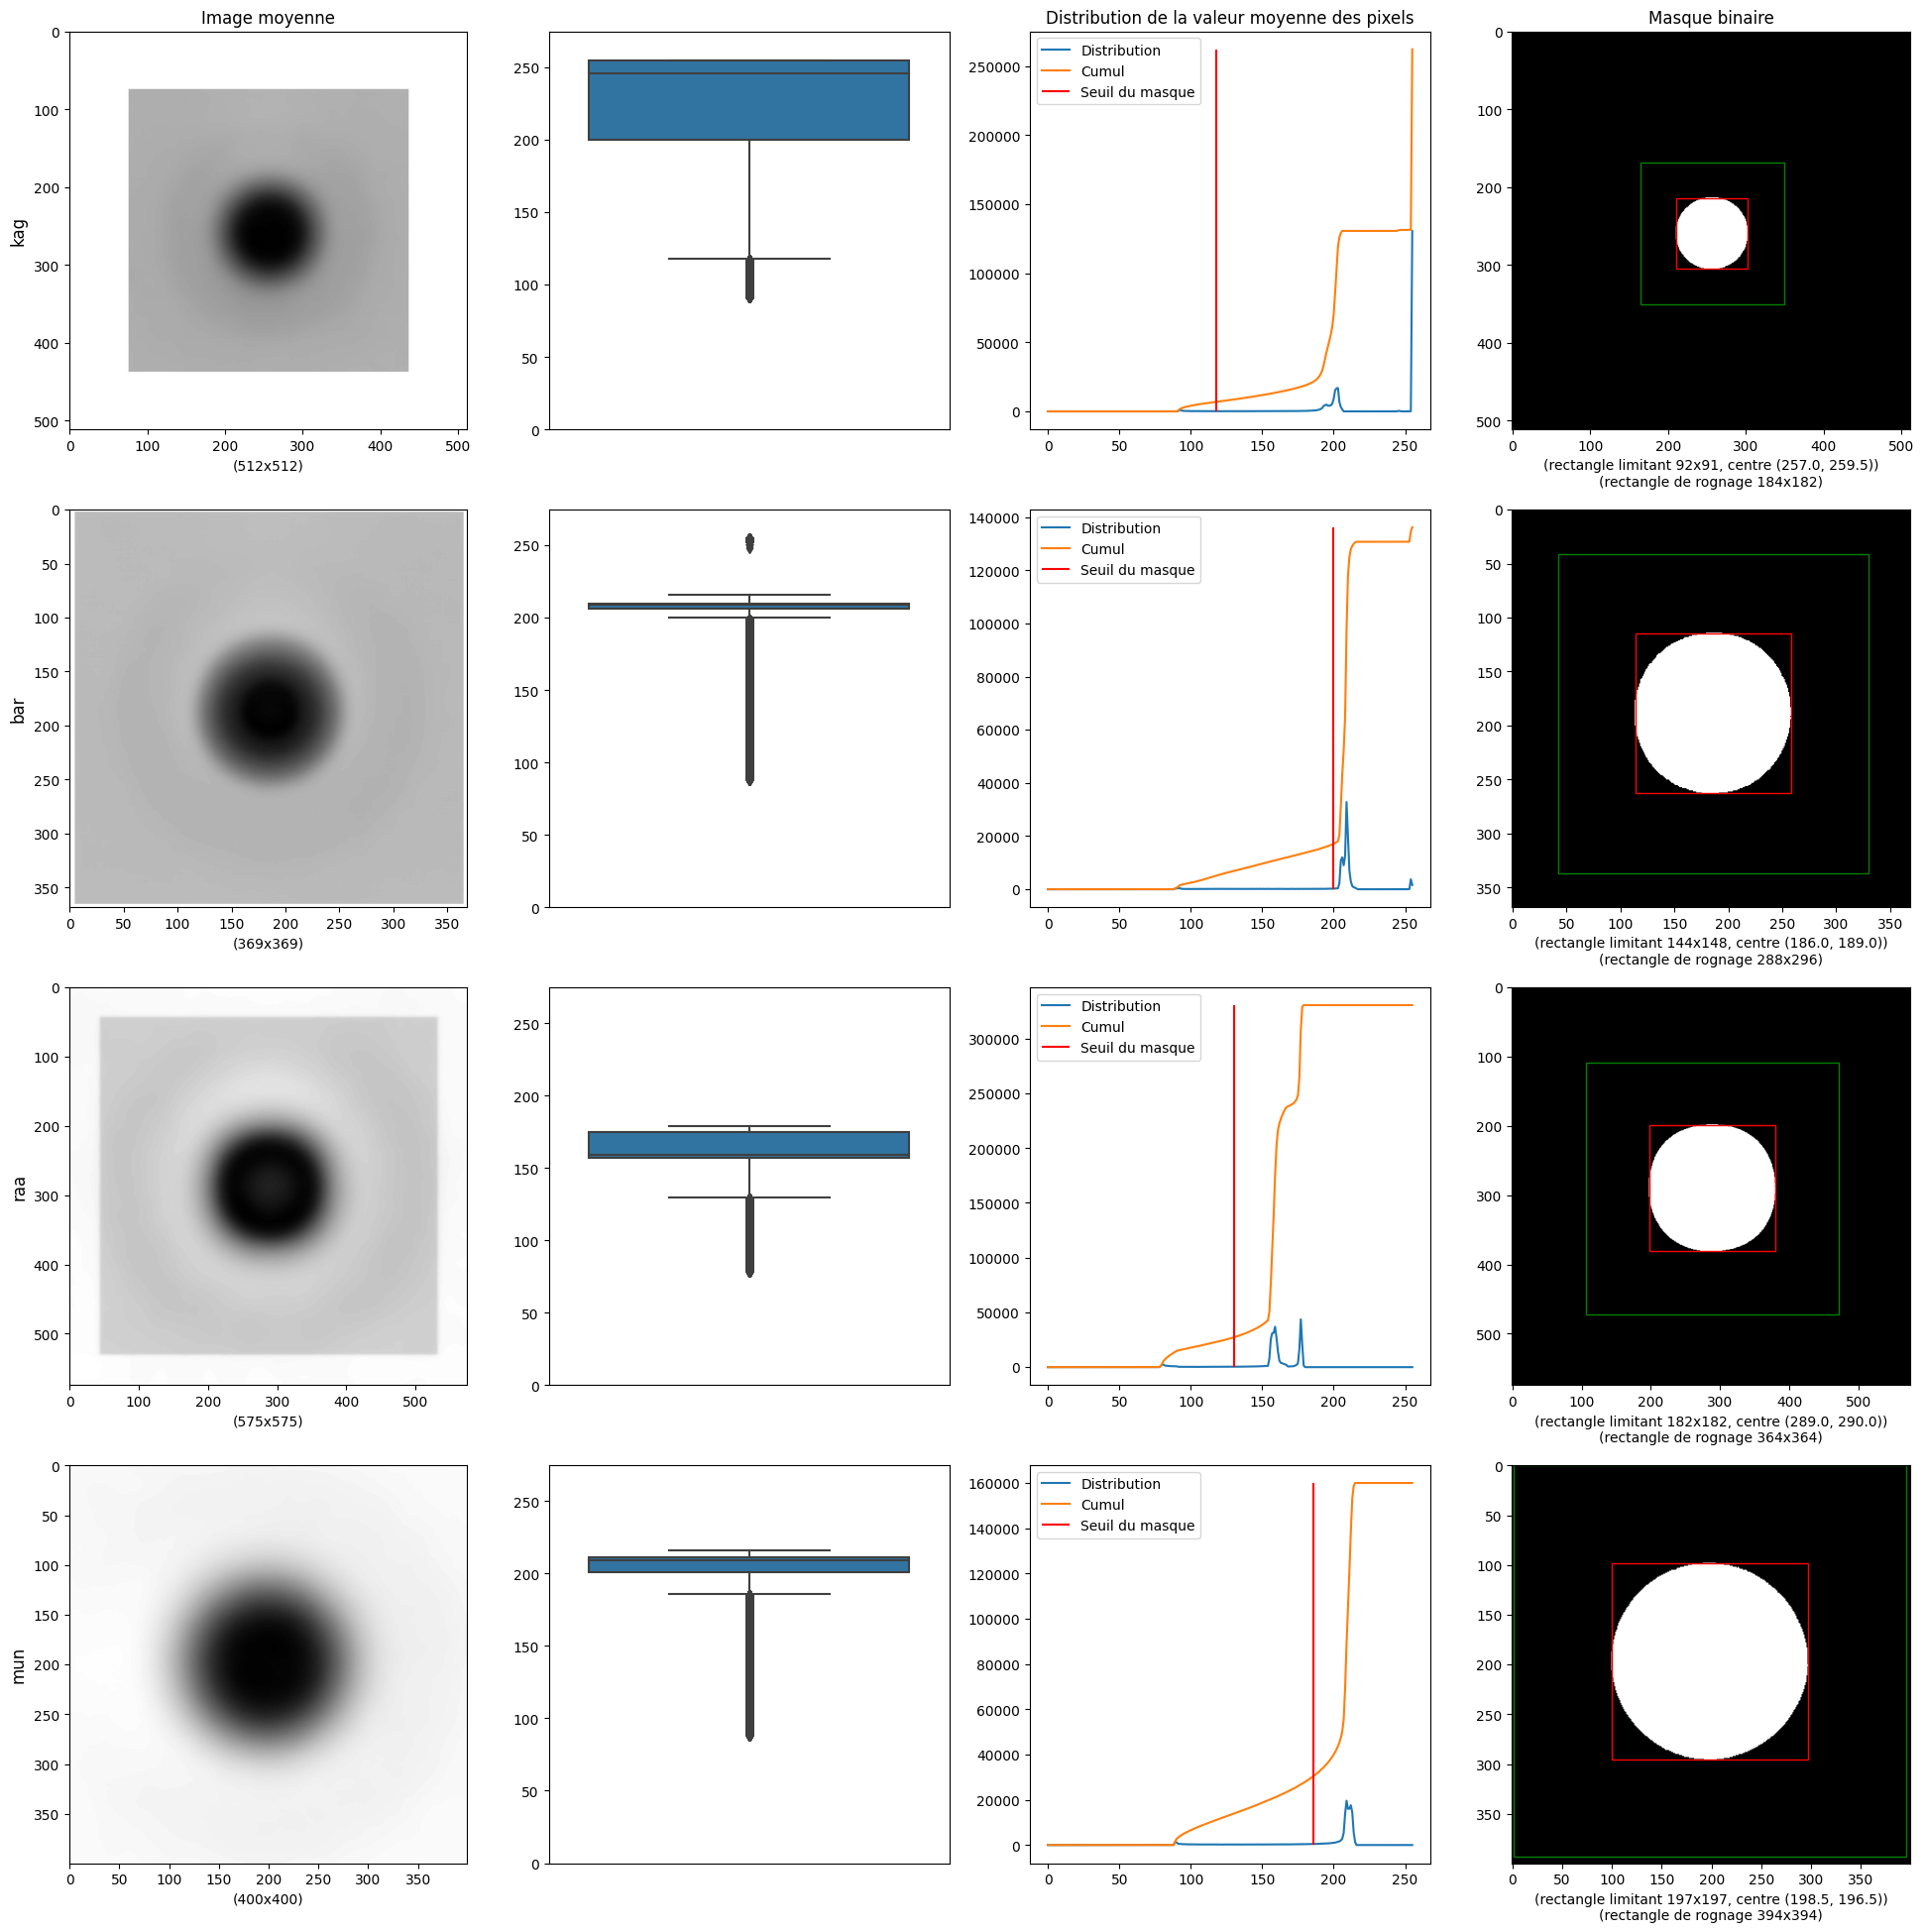

In [55]:
fig, axs = plt.subplots(nrows=len(sources), ncols=4, figsize=(24, 24))

for i, src in enumerate(sources):
    img = mean_images_by_source[i]
    hist = {v: 0 for v in range(256)}
    
    # Pixel values distribution
    for px in np.round(img).astype(np.int16).flat:
        hist[px] += 1
    
    # Cumulative distribution
    cum_hist = bcc.cumsum(list(hist.values()))

    # Mean pixel values distribution along axis
    x = img.mean(axis=0)
    y = img.mean(axis=1)

    # Binary mask
    q1, q3 = np.quantile(img, [0.25, 0.75])
    iqr = q3 - q1
    mask_limit = q1 - 1.5 * iqr
    mask = np.where(img>mask_limit, 0, 1)

    # Bounding box
    y_1, y_2, x_1, x_2 = bcc.bbox(mask)
    bb_width, bb_height = x_2 - x_1, y_2 - y_1

    # Min cropping box
    cb_ratio = 2
    cb_width, cb_height = cb_ratio * bb_width, cb_ratio * bb_height
    x_3, y_3 = x_1 - (cb_width-bb_width) / 2, y_1 - (cb_height-bb_height) / 2

    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].set_xlabel(f'({img.shape[1]}x{img.shape[0]})')

    sns.boxplot(img.flat, ax=axs[i, 1])
    axs[i, 1].set_ylim(0, 275)
    axs[i, 1].set_xticks([])

    axs[i, 2].plot(list(hist.values()), label='Distribution')
    axs[i, 2].plot(cum_hist, label='Cumul')
    axs[i, 2].vlines(mask_limit, ymin=0, ymax=cum_hist[-1], colors=['red'], label='Seuil du masque')
    axs[i, 2].legend()

    axs[i, 3].imshow(mask, cmap='gray')
    axs[i, 3].add_patch(Rectangle((x_1, y_1), bb_width, bb_height, edgecolor='red', fill=False))
    axs[i, 3].add_patch(Rectangle((x_3, y_3), cb_width, cb_height, edgecolor='green', fill=False))
    axs[i, 3].set_xlabel(f'(rectangle limitant {bb_width}x{bb_height}, centre ({x_1+(x_2-x_1)/2}, {y_1+(y_2-y_1)/2}))\n(rectangle de rognage {cb_width}x{cb_height})')

col_headers = ['Image moyenne', '', 'Distribution de la valeur moyenne des pixels', 'Masque binaire']

for ax, col in zip(axs[0], col_headers):
    ax.set_title(col)

for ax, row in zip(axs[:, 0], sources):
    ax.set_ylabel(row, rotation=90, size='large')

fig.savefig(Path(eda_save_dir, 'mean_blood_cell_position_by_source.png'))
plt.show();

In [20]:
min_w, min_h = 1000, 1000

for current_dir, subdir_list, files_list in os.walk('../data/images/original/base'):
    curr_dir = bcc.split_path(current_dir)[-1]
    if curr_dir != 'mean_images' or curr_dir != 'unlabeled':
        for file in files_list:
            if bcc.file_is_a(file, bcc.IMG_EXTS):
                img = cv2.imread(f'{current_dir}/{file}', cv2.IMREAD_GRAYSCALE)
                h, w = img.shape
                if h < min_h: min_h = h
                if w < min_w: min_w = w

print(f'Plus petite dimension d\'image: {w}x{h}')

Plus petite dimension d'image: 360x365


On voit sur l’analyse ci-dessus :
- que les cellules semblent être globalement centrées sur les images ;
- qu’il est envisageable de découper les images à une dimension de 400x400 sans perdre d’information concernant la cellule présente sur celles-ci.

Toutefois, cette analyse a été réalisée sur l’ensemble des images de chaque source. Il faut donc affiner en croisant la source et le type de cellule sanguine. En effet, les cellules sanguines n’ayant pas toute la même taille, il est probable que cela soit reflété dans les images.

#### 1.2.3. En fonction de la cellule sanguine et de la source

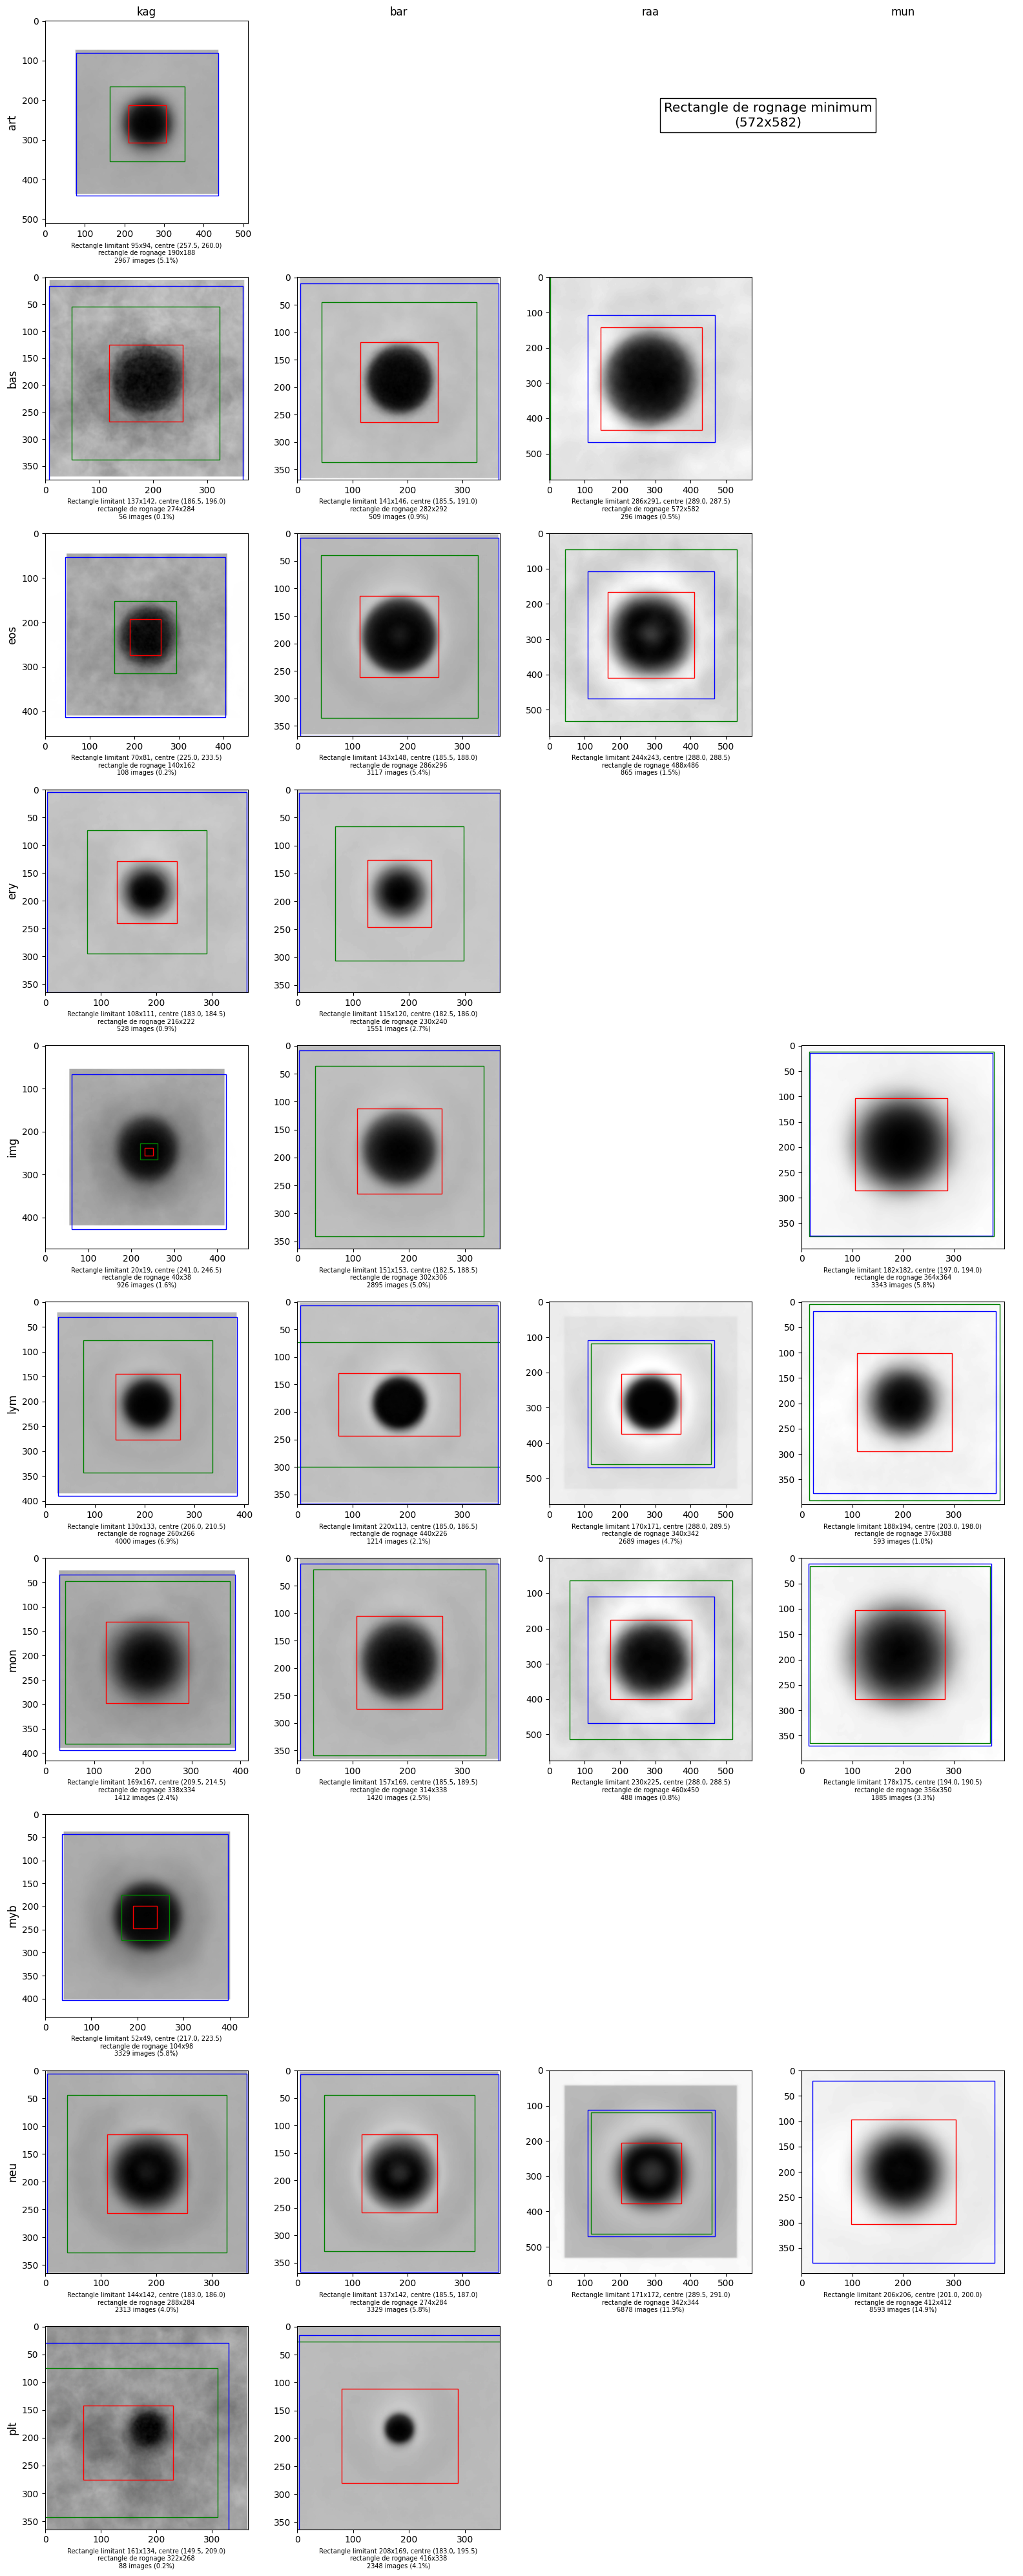

In [56]:
min_width, min_height = 0, 0

target_width, target_height = 360, 360

fig, axs = plt.subplots(ncols=len(sources), nrows=len(blood_cells), figsize=(16, 40), tight_layout=True)

for bc in range(len(blood_cells)):
    for src in range(len(sources)):
        img_name = f'{sources[src]}_{blood_cells[bc]}_mean_image.jpg'
        img_path = Path(mean_images_dir, img_name)
        if img_path.exists():
            img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
            
            # Binary mask
            q1, q3 = np.quantile(img, [0.25, 0.75])
            iqr = q3 - q1
            mask_limit = q1 - 1.5 * iqr
            mask = np.where(img>mask_limit, 0, 1)

            try:
                # Bounding box
                y_1, y_2, x_1, x_2 = bcc.bbox(mask)
                bb_width, bb_height = x_2 - x_1, y_2 - y_1
                center_x, center_y = x_1 + (x_2-x_1) / 2, y_1 + (y_2-y_1) / 2

                # Min cropping box
                cb_ratio = 2
                cb_width, cb_height = cb_ratio * bb_width, cb_ratio * bb_height
                x_3, y_3 = x_1 - (cb_width-bb_width) / 2, y_1 - (cb_height-bb_height) / 2

                # Targetted cropping box
                x_5, y_5 = x_1 - (target_width-bb_width) / 2, y_1 - (target_height-bb_height) / 2

                if cb_width > min_width: min_width = cb_width
                if cb_height > min_height: min_height = cb_height

                img_count = df_pix_dis[(df_pix_dis['source'] == sources[src]) & (df_pix_dis['blood_cell'] == blood_cells[bc])].shape[0]
                img_prop = img_count / df_pix_dis.shape[0] * 100

                axs[bc, src].imshow(img, cmap='gray')
                axs[bc, src].add_patch(Rectangle((x_1, y_1), bb_width, bb_height, edgecolor='red', fill=False))
                axs[bc, src].add_patch(Rectangle((x_3, y_3), cb_width, cb_height, edgecolor='green', fill=False))
                axs[bc, src].add_patch(Rectangle((x_5, y_5), target_width, target_height, edgecolor='blue', fill=False))
                axs[bc, src].set_xlabel(
                    f'Rectangle limitant {bb_width}x{bb_height}, centre ({center_x}, {center_y})\nrectangle de rognage {cb_width}x{cb_height}\n{img_count} images ({img_prop:.01f}%)', 
                    fontdict = {'fontsize': 7}
                    )
            except:
                axs[bc, src].imshow(img, cmap='gray')
                axs[bc, src].set_xlabel(f'Rectangle limitant non trouvé\n{img_count} images ({img_prop:.01f}%)', fontdict={'fontsize': 7})
        else:
            axs[bc, src].axis('off')

for ax, col in zip(axs[0], sources):
    ax.set_title(col)

for ax, row in zip(axs[:, 0], blood_cells):
    ax.set_ylabel(row, rotation=90, size='large')

plt.figtext(0.75, 0.95, f'Rectangle de rognage minimum\n({min_width}x{min_height})', fontsize='x-large', horizontalalignment='center', bbox={'facecolor': 'white'})

fig.savefig(Path(eda_save_dir, 'mean_blood_cell_position_by_source-blood_cell.png'))
plt.show();

On remarque deux choses :
- qu'il y'a effectivement d'importantes différences entre les cellules sanguines : la frontière minimale trouvée est de 92x98 ('myb' de kaggle), tandis que la frontière maximal est de 572x582 ('bas' de raabin)
- que l'algorithme choisi pour détecter la frontière de découpe n'a pas la même performance pour toutes les cellules : les images de kaggle semblent être particulièrement problématiques ('art', 'eos', 'myb', 'plt', 'pyc'), ainsi que certaines images provenant de barcelone ('lym', 'plt').

Toutefois, en découpant toutes les images à une dimension de 360x360, il ne devrait pas y avoir trop de perte d'information, sauf pour certaines images de raabin ('bas', 'eos' et 'mon') et de munich ('neu') pour lesquels il faudra redimensionner les images plutôt que les découper.

### 1.3. Recherche des cellules en bord de plaquette

Au cours de l'exploration des images, il est apparu que certaines photos avaient été prises en bord de plaquette, avec potentiellement une cellule tronquée. Nous allons cherché à isoler ces images.

Comme ces images présentent de larges zones noires (délimitant l'extérieur de la plaquette), nous allons isoler les images présentant un nombre anormal de pixels noirs.

In [20]:
pixels_steps = [0, 10, 20, 30, 40, 50, 60, 70, 80 ,90, 100, 150, 200, 256]

In [21]:
# Calcul de la proportion de pixels par plage de valeur de gris
df_black = df_pix_dis.loc[:, ['source']]

for i in range(1, len(pixels_steps)):
    lower_bound, upper_bound = pixels_steps[i-1], pixels_steps[i]
    df_black[f'[{lower_bound}, {upper_bound})'] = df_pix_dis['gray_distribution'].apply(lambda l: np.sum(l[lower_bound:upper_bound])/np.sum(l))

df_black.head()

,source,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)","[100, 150)","[150, 200)","[200, 256)"
img_id,,,,,,,,,,,,,,
ART_kag_000_016440.jpg,kag,0.0,0.0,0.0,0.0,0.001064,0.009695,0.015565,0.015083,0.012290,0.007346,0.118687,0.147253,0.673018
ART_kag_000_016441.jpg,kag,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000054,0.000559,0.004706,0.260652,0.133502,0.600528
ART_kag_000_016442.jpg,kag,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000046,0.000551,0.004362,0.243541,0.160208,0.591292
ART_kag_000_016443.jpg,kag,0.0,0.0,0.0,0.0,0.000000,0.000107,0.000849,0.003581,0.012068,0.017554,0.152525,0.152013,0.661302
ART_kag_000_016444.jpg,kag,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000031,0.000497,0.001752,0.006068,0.253926,0.180510,0.557216


In [22]:
df_bp = pd.melt(df_black.reset_index().drop('img_id', axis=1), id_vars=['source'], var_name='pixels_range', value_name='prop')

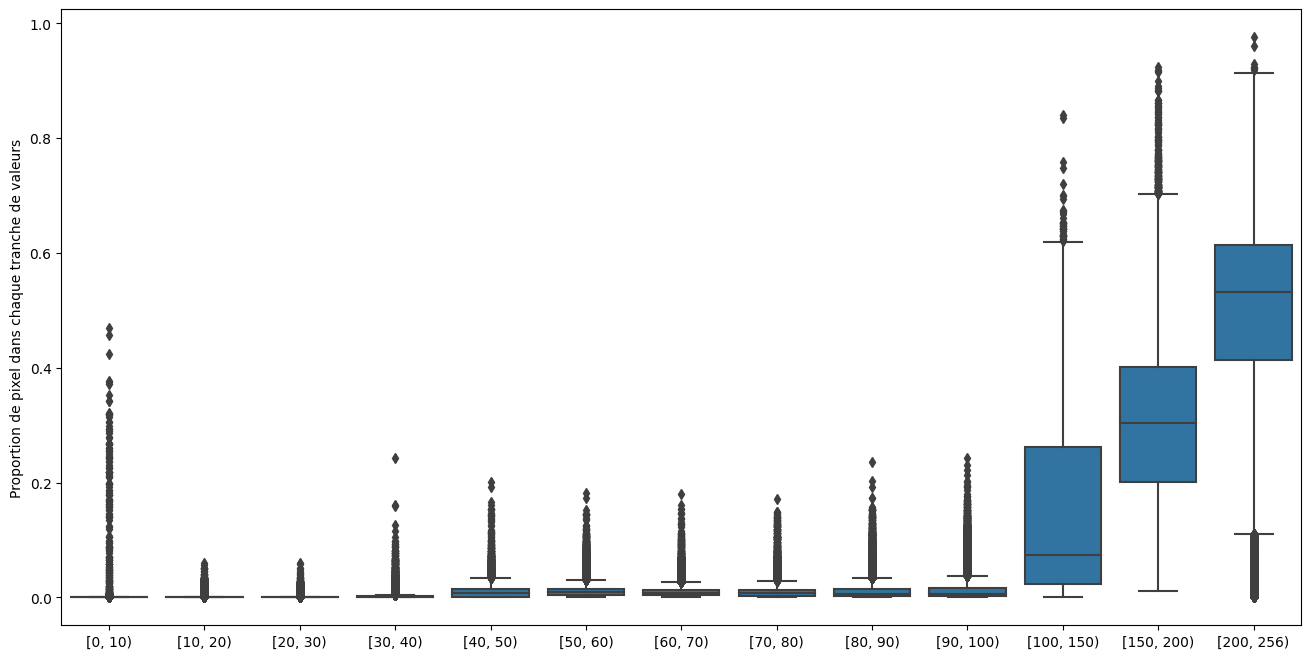

In [49]:
plt.figure(figsize=(16, 8))

sns.boxplot(df_bp, x='pixels_range', y='prop', color=cmap(0))
plt.xlabel('')
plt.ylabel('Proportion de pixel dans chaque tranche de valeurs')

plt.savefig(Path(eda_save_dir, 'gray_pixels_boxplot_by_pixels_range.png'))
plt.show();

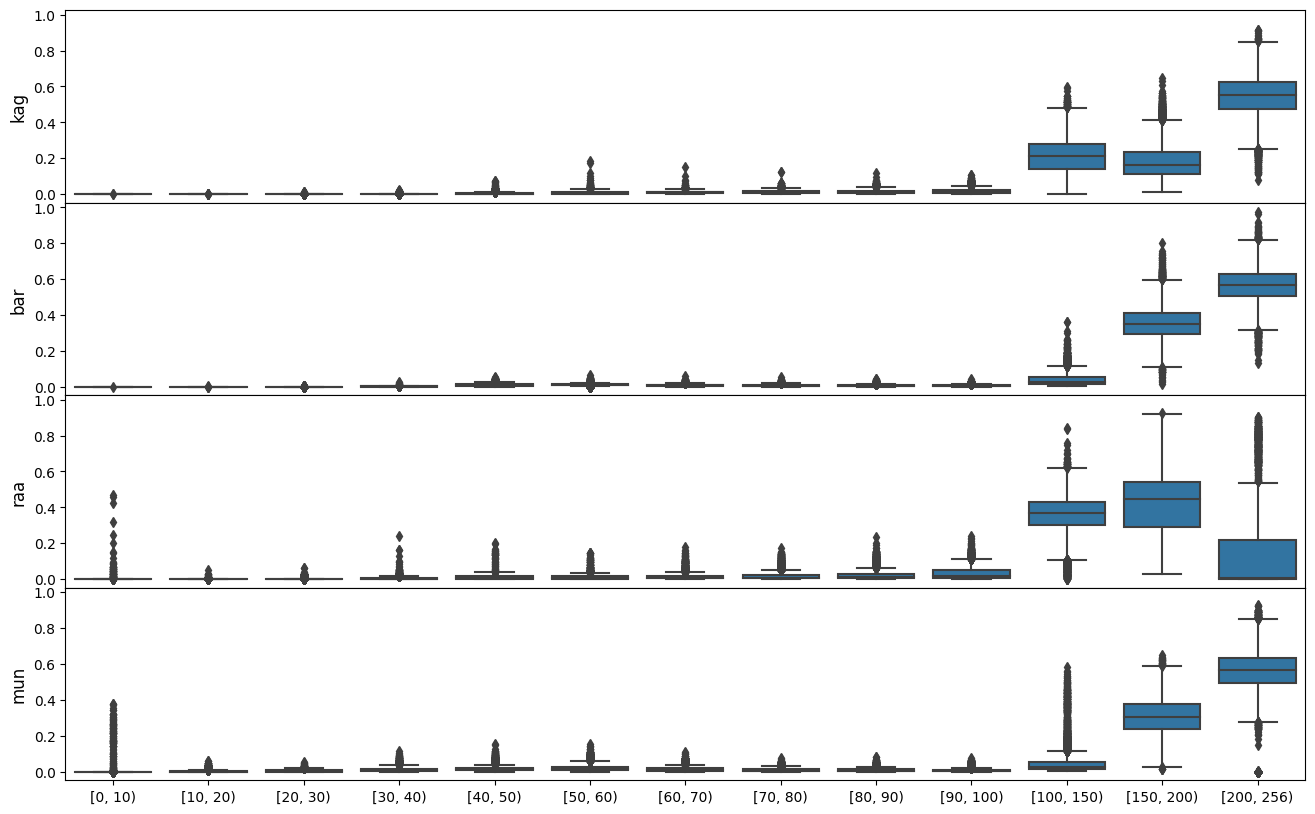

In [27]:
fig, axs = plt.subplots(nrows=len(sources), figsize=(16, 10), sharex=True, sharey=True)

for src in range(len(sources)):
    df_sub = df_bp[(df_bp['source'] == sources[src])]
    sns.boxplot(df_sub, x='pixels_range', y='prop', color=cmap(0), ax=axs[src])
    axs[src].set_xlabel('')

for ax, row in zip(axs, sources):
    ax.set_ylabel(row, rotation=90, size='large')

fig.subplots_adjust(hspace=0)
fig.savefig(Path(eda_save_dir, 'gray_pixels_boxplot_by_source-pixels_range.png'))
plt.show();

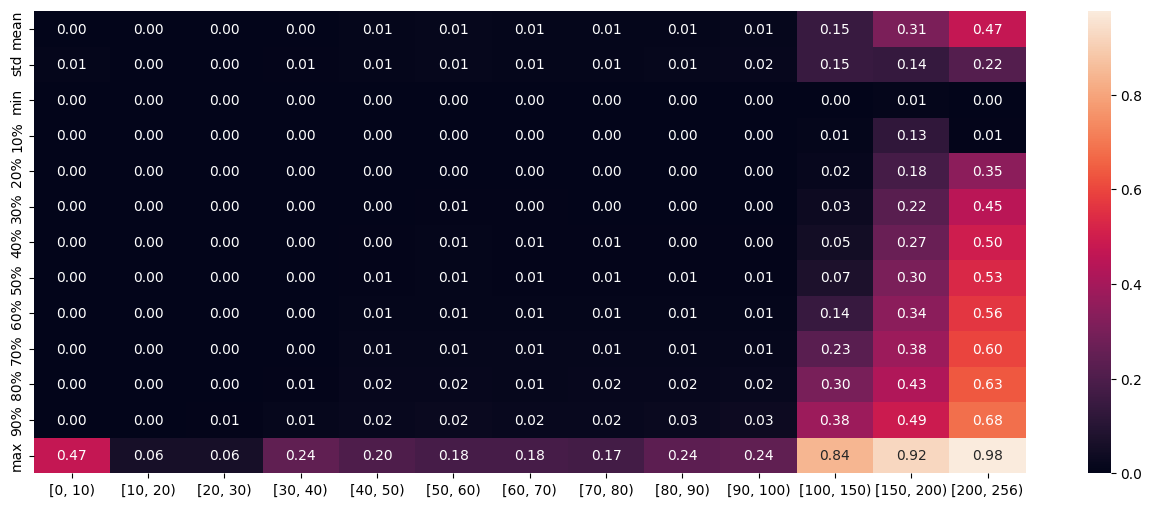

In [33]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_black.describe(percentiles=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)).drop('count', axis=0), annot=True, fmt='.02f')

plt.savefig(Path(eda_save_dir, 'gray_pixels_heatmap_by_pixels_range.png'))
plt.show();

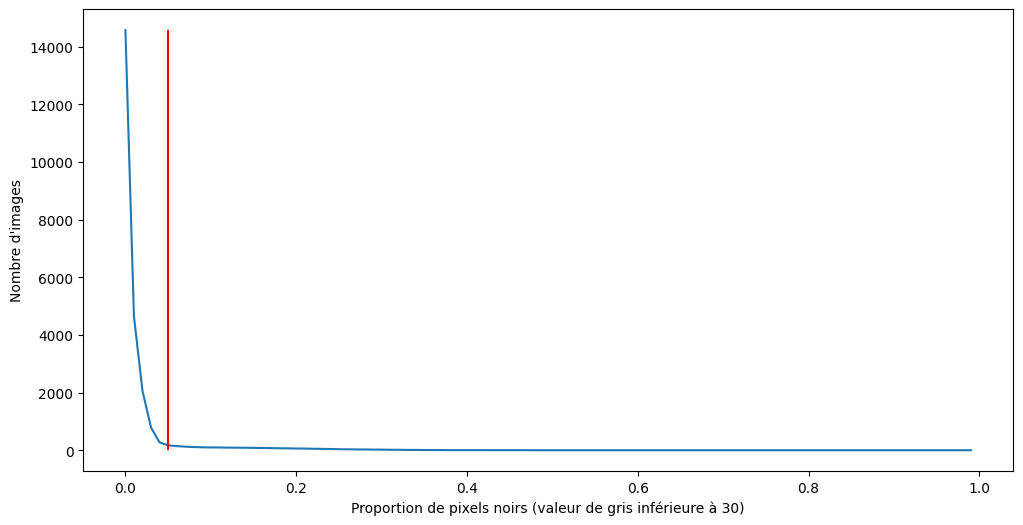

In [71]:
# Analyse de la proportion de pixels noirs (valeur de gris inférieure à 30) dans les images
blk_px_prop_rng = np.arange(0.0, 1.0, 0.01)

plt.figure(figsize=(12, 6))

blk_px_prop = []
for i in blk_px_prop_rng:
    blk_px_prop.append(df_pix_dis[df_pix_dis['gray_distribution'].apply(lambda d: np.sum(d[:30])/np.sum(d)) > i].shape[0])

plt.plot(blk_px_prop_rng, blk_px_prop)
plt.vlines(0.05, ymin=0, ymax=blk_px_prop[0], colors=['red'])

plt.xlabel('Proportion de pixels noirs (valeur de gris inférieure à 30)')
plt.ylabel(f'Nombre d\'images')

plt.savefig(Path(eda_save_dir, 'number_of_images_vs_proportion_of_black_pixels.png'))
plt.show()

On remarque que la présence de pixels noirs est vraiment marginal dans les images, d'autant plus lorsqu'on que le nombre de pixel augmente.

In [70]:
nb_blk_px = df_pix_dis[df_pix_dis['gray_distribution'].apply(lambda d: np.sum(d[:30])/np.sum(d)) > 0.05].shape[0]
prop_blk_px = nb_blk_px / df_pix_dis.shape[0]

print(f'Nombre d\'images présentants plus de 5% de pixels noirs: {nb_blk_px} ({prop_blk_px*100:002f}%)')

Nombre d'images présentants plus de 5% de pixels noirs: 168 (0.290959%)
